In [ ]:
%pip install mlflow --quiet

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-3de1ee39-5757-48dc-989b-0381a6844382/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [ ]:
dbutils.fs.unmount("/mnt/s3data")

/mnt/s3data has been unmounted.
Out[1]: True

In [ ]:
import urllib
ACCESS_KEY = "XXXXXXXXXXX"
SECRET_KEY = "XXXXXXXXXXX"
ENCODED_SECRET_KEY = urllib.parse.quote(SECRET_KEY, "")
AWS_BUCKET_NAME = "bankmarket1611"
MOUNT_NAME = "s3data"
dbutils.fs.mount("s3n://%s:%s@%s" % (ACCESS_KEY, ENCODED_SECRET_KEY, AWS_BUCKET_NAME), "/mnt/%s" % MOUNT_NAME)
display(dbutils.fs.ls("/mnt/s3data"))

path,name,size
dbfs:/mnt/s3data/bank-additional-full.csv,bank-additional-full.csv,5834924
dbfs:/mnt/s3data/bank-additional.csv,bank-additional.csv,583898
dbfs:/mnt/s3data/bank-full.csv,bank-full.csv,4610348
dbfs:/mnt/s3data/bank.csv,bank.csv,461474


In [ ]:
file_location= "dbfs:/mnt/s3data/bank-full.csv"
file_type= "csv"

infer_schema= "true"
first_row_is_header= "true"
delimiter= ";"

df = spark.read.load(file_location,
                     format=file_type, 
                     sep=delimiter, 
                     inferSchema=True, 
                     header=first_row_is_header)
display(df)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
print(df.columns)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [ ]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [ ]:
temp_table_name= "data"
df.createOrReplaceTempView(temp_table_name)

In [ ]:
df.stat.freqItems(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','day', 'month',  'poutcome', 'y'],0.5).collect()

Out[7]: [Row(job_freqItems=['management'], marital_freqItems=['married', 'single'], education_freqItems=['tertiary', 'secondary'], default_freqItems=['no', 'yes'], housing_freqItems=['no', 'yes'], loan_freqItems=['no', 'yes'], contact_freqItems=['cellular', 'unknown'], day_freqItems=[17, 16], month_freqItems=['aug', 'may'], poutcome_freqItems=['failure', 'unknown'], y_freqItems=['no', 'yes'])]

In [ ]:
%sql
SELECT y, count(y)
FROM data
GROUP BY y

y,count(y)
no,39922
yes,5289


> Note: Data is unbalanced. Need to use AUC instead of Accuracy

In [ ]:
%sql
SELECT job, count(job) as number_of_people_targeted
FROM data
GROUP BY job

job,number_of_people_targeted
management,9458
retired,2264
unknown,288
self-employed,1579
student,938
blue-collar,9732
entrepreneur,1487
admin.,5171
technician,7597
services,4154


In [ ]:
%sql
SELECT job,y, count(y)
FROM data
GROUP BY job,y
ORDER BY job,y

job,y,count(y)
admin.,no,4540
admin.,yes,631
blue-collar,no,9024
blue-collar,yes,708
entrepreneur,no,1364
entrepreneur,yes,123
housemaid,no,1131
housemaid,yes,109
management,no,8157
management,yes,1301


> connversion percentage is high among students(31%) and retired employee(25%)

In [ ]:
%sql
SELECT education, count(education) as number_of_people_targeted
FROM data
GROUP BY education

education,number_of_people_targeted
unknown,1857
tertiary,13301
secondary,23202
primary,6851


In [ ]:
%sql
SELECT education,y, count(y)
FROM data
GROUP BY education,y
ORDER BY education,y

education,y,count(y)
primary,no,6260
primary,yes,591
secondary,no,20752
secondary,yes,2450
tertiary,no,11305
tertiary,yes,1996
unknown,no,1605
unknown,yes,252


In [ ]:
numeric_features = [x[0] for x in df.dtypes if x[1] == 'int']
df.select(numeric_features).show()

+---+-------+---+--------+--------+-----+--------+
|age|balance|day|duration|campaign|pdays|previous|
+---+-------+---+--------+--------+-----+--------+
| 58|   2143|  5|     261|       1|   -1|       0|
| 44|     29|  5|     151|       1|   -1|       0|
| 33|      2|  5|      76|       1|   -1|       0|
| 47|   1506|  5|      92|       1|   -1|       0|
| 33|      1|  5|     198|       1|   -1|       0|
| 35|    231|  5|     139|       1|   -1|       0|
| 28|    447|  5|     217|       1|   -1|       0|
| 42|      2|  5|     380|       1|   -1|       0|
| 58|    121|  5|      50|       1|   -1|       0|
| 43|    593|  5|      55|       1|   -1|       0|
| 41|    270|  5|     222|       1|   -1|       0|
| 29|    390|  5|     137|       1|   -1|       0|
| 53|      6|  5|     517|       1|   -1|       0|
| 58|     71|  5|      71|       1|   -1|       0|
| 57|    162|  5|     174|       1|   -1|       0|
| 51|    229|  5|     353|       1|   -1|       0|
| 45|     13|  5|      98|     

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
stages = []


In [ ]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for categorical_feature in categorical_features:
    stringIndexer = StringIndexer(inputCol = categorical_feature, outputCol = categorical_feature + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categorical_feature + "cat_vec"])
    
    stages += [stringIndexer, encoder]
    
    

In [ ]:
label_indexer = StringIndexer(inputCol = 'y', outputCol = 'label')
stages += [label_indexer]

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler_input = [c + "cat_vec" for c in categorical_features] + numeric_features
assembler = VectorAssembler(inputCols=assembler_input, outputCol='features')
stages += [assembler]


In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)

pipelineModel = pipeline.fit(df)
df= pipelineModel.transform(df)

In [ ]:
df_final= df.select('label', 'features')
display(df_final)

label,features
0.0,"Map(vectorType -> sparse, length -> 42, indices -> List(1, 11, 14, 16, 17, 18, 20, 21, 32, 35, 36, 37, 38, 39, 40), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 58.0, 2143.0, 5.0, 261.0, 1.0, -1.0))"
0.0,"Map(vectorType -> sparse, length -> 42, indices -> List(2, 12, 13, 16, 17, 18, 20, 21, 32, 35, 36, 37, 38, 39, 40), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 44.0, 29.0, 5.0, 151.0, 1.0, -1.0))"
0.0,"Map(vectorType -> sparse, length -> 42, indices -> List(7, 11, 13, 16, 17, 20, 21, 32, 35, 36, 37, 38, 39, 40), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 33.0, 2.0, 5.0, 76.0, 1.0, -1.0))"
0.0,"Map(vectorType -> sparse, length -> 42, indices -> List(0, 11, 16, 17, 18, 20, 21, 32, 35, 36, 37, 38, 39, 40), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 47.0, 1506.0, 5.0, 92.0, 1.0, -1.0))"
0.0,"Map(vectorType -> sparse, length -> 42, indices -> List(12, 16, 18, 20, 21, 32, 35, 36, 37, 38, 39, 40), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 33.0, 1.0, 5.0, 198.0, 1.0, -1.0))"
0.0,"Map(vectorType -> sparse, length -> 42, indices -> List(1, 11, 14, 16, 17, 18, 20, 21, 32, 35, 36, 37, 38, 39, 40), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 35.0, 231.0, 5.0, 139.0, 1.0, -1.0))"
0.0,"Map(vectorType -> sparse, length -> 42, indices -> List(1, 12, 14, 16, 17, 20, 21, 32, 35, 36, 37, 38, 39, 40), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 28.0, 447.0, 5.0, 217.0, 1.0, -1.0))"
0.0,"Map(vectorType -> sparse, length -> 42, indices -> List(7, 14, 17, 18, 20, 21, 32, 35, 36, 37, 38, 39, 40), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 42.0, 2.0, 5.0, 380.0, 1.0, -1.0))"
0.0,"Map(vectorType -> sparse, length -> 42, indices -> List(5, 11, 15, 16, 17, 18, 20, 21, 32, 35, 36, 37, 38, 39, 40), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 58.0, 121.0, 5.0, 50.0, 1.0, -1.0))"
0.0,"Map(vectorType -> sparse, length -> 42, indices -> List(2, 12, 13, 16, 17, 18, 20, 21, 32, 35, 36, 37, 38, 39, 40), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 43.0, 593.0, 5.0, 55.0, 1.0, -1.0))"


In [ ]:
train, test = df_final.randomSplit([0.8, 0.2], seed = 1)

In [ ]:
from pyspark.ml.classification import LogisticRegression

log_reg = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)

model = log_reg.fit(train)

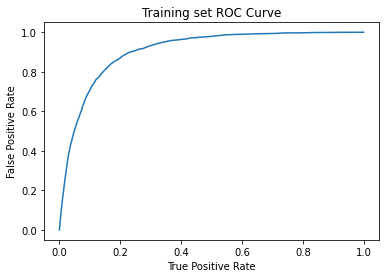

In [ ]:
import matplotlib.pyplot as plt
train_summary = model.summary
roc = train_summary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Training set ROC Curve')
plt.show()

In [ ]:
train_accuracy = train_summary.accuracy
train_areaUnderROC= train_summary.areaUnderROC
print(" Training Accuracy: " , train_accuracy)
print(" Training Area under ROC: " , train_areaUnderROC)

 Training Accuracy:  0.8985731666851012
 Training Area under ROC:  0.9062274052684312


In [ ]:
predictions = model.transform(test)
predictions.select('label', 'prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 20 rows



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
test_areaUnderROC= evaluator.evaluate(predictions)
test_accuracy= model.evaluate(test).accuracy
print('Test accuracy', test_accuracy)
print('Test Area Under ROC', test_areaUnderROC)

Test accuracy 0.8994141704432409
Test Area Under ROC 0.9084992077101763


In [ ]:
# import mlflow
# import mlflow.sklearn
# from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# # Create ParamGrid for Cross Validation
# paramGrid = (ParamGridBuilder()
#              .addGrid(log_reg.regParam, [0.01, 0.5, 1.0])
#              .addGrid(log_reg.elasticNetParam, [0.0, 0.5, 1.0])
#              .addGrid(log_reg.maxIter, [2, 5, 10])
#              .build())

# cv = CrossValidator(estimator=log_reg, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# cv_model = cv.fit(train)
# predictions = cv_model.bestModel.transform(test)
# print('Test Area Under ROC after parameter tuning', evaluator.evaluate(predictions))